## Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report

## Importing Dataset

In [2]:
data = pd.read_csv('covtype.csv')

## Exploratory Data Analysis

In [3]:
data

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
0,2596,51,3,258,0,510,221,232,148,6279,...,0,0,0,0,0,0,0,0,0,5
1,2590,56,2,212,-6,390,220,235,151,6225,...,0,0,0,0,0,0,0,0,0,5
2,2804,139,9,268,65,3180,234,238,135,6121,...,0,0,0,0,0,0,0,0,0,2
3,2785,155,18,242,118,3090,238,238,122,6211,...,0,0,0,0,0,0,0,0,0,2
4,2595,45,2,153,-1,391,220,234,150,6172,...,0,0,0,0,0,0,0,0,0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
581007,2396,153,20,85,17,108,240,237,118,837,...,0,0,0,0,0,0,0,0,0,3
581008,2391,152,19,67,12,95,240,237,119,845,...,0,0,0,0,0,0,0,0,0,3
581009,2386,159,17,60,7,90,236,241,130,854,...,0,0,0,0,0,0,0,0,0,3
581010,2384,170,15,60,5,90,230,245,143,864,...,0,0,0,0,0,0,0,0,0,3


In [17]:
data.head()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
0,2596,51,3,258,0,510,221,232,148,6279,...,0,0,0,0,0,0,0,0,0,5
1,2590,56,2,212,-6,390,220,235,151,6225,...,0,0,0,0,0,0,0,0,0,5
2,2804,139,9,268,65,3180,234,238,135,6121,...,0,0,0,0,0,0,0,0,0,2
3,2785,155,18,242,118,3090,238,238,122,6211,...,0,0,0,0,0,0,0,0,0,2
4,2595,45,2,153,-1,391,220,234,150,6172,...,0,0,0,0,0,0,0,0,0,5


In [4]:
data.Cover_Type.value_counts()

2    283301
1    211840
3     35754
7     20510
6     17367
5      9493
4      2747
Name: Cover_Type, dtype: int64

- The target variable - 'Cover_Type' implies that the data is an imbalanced set
- The target variable has classes ranging from 1 - 7 based on forest_cover_types;<br>
    Changing the numbers to start from 0 - 6 so that it is comfortable to work with and fuses with python indexing as well

In [5]:
data['Cover_Type'] = data['Cover_Type'] - 1

In [14]:
data.Cover_Type.value_counts()

1    283301
0    211840
2     35754
6     20510
5     17367
4      9493
3      2747
Name: Cover_Type, dtype: int64

__The target variable classes are very unproportionate, it is an imbalanced dataset__

## Visualizing Class Distribution of Target Variable

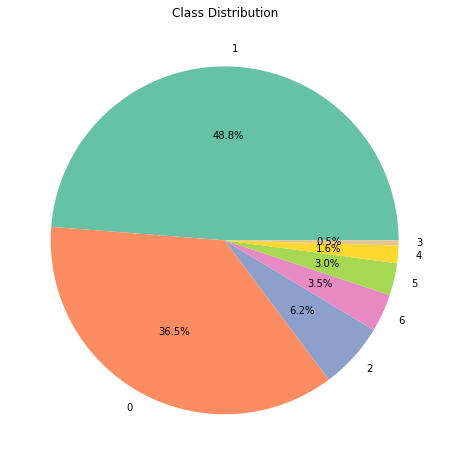

In [9]:
cmap = sns.color_palette('Set2', as_cmap=True)(np.arange(7))

plt.figure(figsize=(8, 8))
plt.pie(
    data.Cover_Type.value_counts().values,
    colors = cmap,
    labels = data.Cover_Type.value_counts().keys(),
    autopct = '%.1f%%'
)

plt.title('Class Distribution')
plt.show()

## Creating Functions for better productivity

In [8]:
# function to split data into 'X' & 'y', train-test-split and scaling X
def split_and_scale(df):
    df = df.copy()

    # Split df into X and y
    X = df.drop('Cover_Type', axis = 1).copy()
    y = df['Cover_Type'].copy()

    # Train_test_split
    X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7, random_state = 123)

    # Scale X and y
    scaler = StandardScaler()
    scaler.fit(X_train)

    X_train = pd.DataFrame(scaler.transform(X_train), columns = X_train.columns)
    X_test = pd.DataFrame(scaler.transform(X_test), columns = X_test.columns)

    return X_train, X_test, y_train, y_test

In [33]:
# function to show model accuracy, predict using test set, visualizing confusion matrix and classification report
def evaluate_model(model, class_balance, X_test, y_test):

    model_acc = model.score(X_test, y_test)
    print('Accuracy ({}): {:.2f}%'.format(class_balance, model_acc * 100))

    y_pred = model.predict(X_test)

    cm = confusion_matrix(y_test, y_pred)
    clr = classification_report(y_test, y_pred)

    plt.figure(figsize=(8,8))
    sns.heatmap(cm, annot=True, fmt='g', vmin=0, cbar=False, cmap='Blues')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix')
    plt.show()

    print('Classification Report:\n-----------------------\n', clr)



## Training (Imbalanced Data)

In [49]:
# applying function to the dataset and making a copy of dataset for modifying
imbalanced_data = data.copy()
X_train, X_test, y_train, y_test = split_and_scale(imbalanced_data)

In [11]:
model1 = LogisticRegression()
model1.fit(X_train, y_train)

C:\Python\Python39\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

Accuracy (Imbalanced): 72.44%


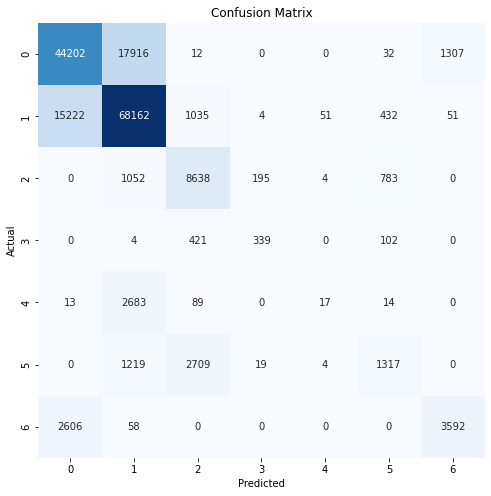

Classification Report:
---------------------
               precision    recall  f1-score   support

           0       0.71      0.70      0.70     63469
           1       0.75      0.80      0.77     84957
           2       0.67      0.81      0.73     10672
           3       0.61      0.39      0.48       866
           4       0.22      0.01      0.01      2816
           5       0.49      0.25      0.33      5268
           6       0.73      0.57      0.64      6256

    accuracy                           0.72    174304
   macro avg       0.60      0.50      0.52    174304
weighted avg       0.71      0.72      0.71    174304



In [50]:
evaluate_model(model1, "Imbalanced", X_test, y_test)

## Training (Undersampling)

In [13]:
undersampled_data = data.copy()

In [15]:
undersampled_data['Cover_Type'].value_counts()

1    283301
0    211840
2     35754
6     20510
5     17367
4      9493
3      2747
Name: Cover_Type, dtype: int64

In [16]:
min_class_size = np.min(undersampled_data['Cover_Type'].value_counts())
print('Size of smallest class:', min_class_size)

Size of smallest class: 2747


Undersampling the records to the minimum target variable class in correspondance to each of the target variable class 

In [23]:
# Undersampling the majority classes
class_subsets = [undersampled_data.query("Cover_Type == " + str(i)) for i in range(7)]

for i in range(7):
    class_subsets[i] = class_subsets[i].sample(min_class_size, replace=False, random_state=123)

# concatenating class_subsets to create undersampled_data
undersampled_data = pd.concat(class_subsets, axis = 0).sample(frac=1.0, random_state=123).reset_index(drop=True)

In [24]:
undersampled_data

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
0,3426,5,13,319,78,3844,202,213,147,3290,...,1,0,0,0,0,0,0,0,0,6
1,3032,138,12,124,17,1637,238,236,127,1080,...,0,0,0,0,0,0,0,0,0,0
2,2165,204,32,295,146,603,186,249,177,295,...,0,0,0,0,0,0,0,0,0,2
3,2834,80,16,513,169,532,240,210,95,2322,...,0,0,0,0,0,0,0,0,0,4
4,2972,293,4,30,5,1539,209,239,168,1630,...,0,0,0,0,0,0,0,0,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19224,2801,110,9,42,4,713,236,230,126,108,...,0,0,0,0,0,0,0,0,0,4
19225,2508,116,28,351,100,330,254,200,53,1209,...,0,0,0,0,0,0,0,0,0,2
19226,1998,325,32,335,143,306,125,187,193,969,...,0,0,0,0,0,0,0,0,0,5
19227,3370,315,3,0,0,4337,212,237,163,4160,...,0,0,0,0,0,0,0,0,1,6


In [25]:
undersampled_data['Cover_Type'].value_counts()

6    2747
0    2747
2    2747
4    2747
1    2747
3    2747
5    2747
Name: Cover_Type, dtype: int64

In [26]:
X_train, X_test, y_train, y_test = split_and_scale(undersampled_data)

In [27]:
model2 = LogisticRegression()
model2.fit(X_train, y_train)

C:\Python\Python39\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

Accuracy (Undersampling): 70.84%


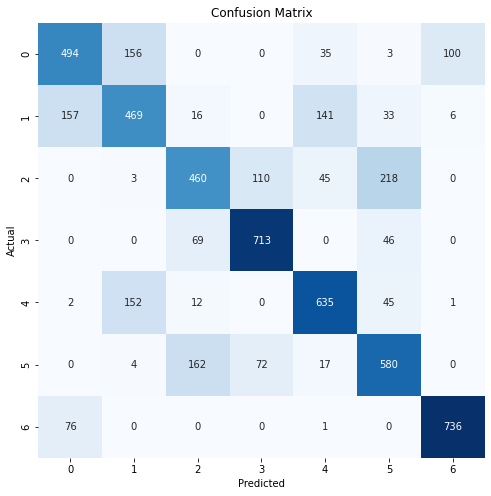

Classification Report:
---------------------
               precision    recall  f1-score   support

           0       0.68      0.63      0.65       788
           1       0.60      0.57      0.58       822
           2       0.64      0.55      0.59       836
           3       0.80      0.86      0.83       828
           4       0.73      0.75      0.74       847
           5       0.63      0.69      0.66       835
           6       0.87      0.91      0.89       813

    accuracy                           0.71      5769
   macro avg       0.71      0.71      0.71      5769
weighted avg       0.71      0.71      0.71      5769



In [36]:
evaluate_model(model2, "Undersampling", X_test, y_test)

## Training (Oversampling)

In [37]:
oversampled_data = data.copy()

In [38]:
oversampled_data['Cover_Type'].value_counts()

1    283301
0    211840
2     35754
6     20510
5     17367
4      9493
3      2747
Name: Cover_Type, dtype: int64

In [39]:
max_class_size = np.max(oversampled_data['Cover_Type'].value_counts())
print('Size of largest class:', max_class_size)

Size of largest class: 283301


In [43]:
# Oversampling the minority classes
class_subsets = [oversampled_data.query('Cover_Type == ' + str(i)) for i in range(7)]

for i in range(7):
    class_subsets[i] = class_subsets[i].sample(max_class_size, replace=True, random_state=123)

oversampled_data = pd.concat(class_subsets, axis=0).sample(frac=1.0, random_state=123).reset_index(drop=True)

In [44]:
oversampled_data

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
0,3426,296,27,277,114,1328,136,221,220,1697,...,0,0,0,0,0,0,0,0,1,6
1,3135,139,17,180,1,1762,243,232,112,2105,...,0,1,0,0,0,0,0,0,0,0
2,2783,88,12,90,12,2187,238,220,110,3360,...,0,0,0,0,0,0,0,0,0,1
3,2166,280,37,60,45,782,96,215,244,633,...,0,0,0,0,0,0,0,0,0,2
4,2807,93,34,190,105,268,249,167,17,2614,...,0,0,0,0,0,0,0,0,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1983102,2867,54,24,391,171,402,226,181,75,1516,...,0,0,0,0,0,0,0,0,0,4
1983103,2152,331,7,0,0,752,203,231,167,1556,...,0,0,0,0,0,0,0,0,0,3
1983104,3139,111,16,240,-32,3301,246,221,99,5060,...,0,0,0,0,0,0,0,0,0,0
1983105,2943,155,19,212,28,1905,239,238,120,1537,...,0,0,0,0,0,0,0,0,0,0


In [45]:
oversampled_data['Cover_Type'].value_counts()

6    283301
0    283301
1    283301
2    283301
4    283301
3    283301
5    283301
Name: Cover_Type, dtype: int64

In [46]:
X_train, X_test, y_train, y_test = split_and_scale(oversampled_data)

In [47]:
model3 = LogisticRegression()
model3.fit(X_train, y_train)

C:\Python\Python39\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

Accuracy (Oversampling): 70.70%


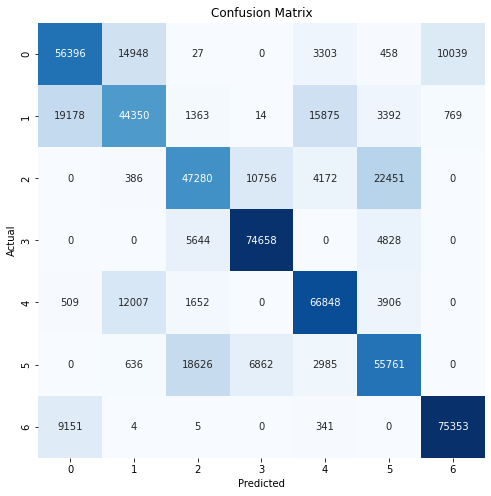

Classification Report:
---------------------
               precision    recall  f1-score   support

           0       0.66      0.66      0.66     85171
           1       0.61      0.52      0.56     84941
           2       0.63      0.56      0.59     85045
           3       0.81      0.88      0.84     85130
           4       0.71      0.79      0.75     84922
           5       0.61      0.66      0.63     84870
           6       0.87      0.89      0.88     84854

    accuracy                           0.71    594933
   macro avg       0.70      0.71      0.70    594933
weighted avg       0.70      0.71      0.70    594933



In [48]:
evaluate_model(model3, "Oversampling", X_test, y_test)

## Conclusion
After performing undersampling and oversampling on the imbalanced dataset;
- Undersampling accuracy : 70.84%
- Oversampling accuracy : 70.70%

Though undersampling gives more accuracy than oversampling, oversampling must be always preferred unless;
- computation resource or time is lacking
- undersampling has an considerable amount of accuracy than oversampling